In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,auc,roc_auc_score,roc_curve,precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Supervised Learning/Classification Problem/Project/Confusion Matrix/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

# **Check Null value or Missing value**

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Now we can take a look at how many patients are actually suffering from heart disease (1) and how many are not (0)

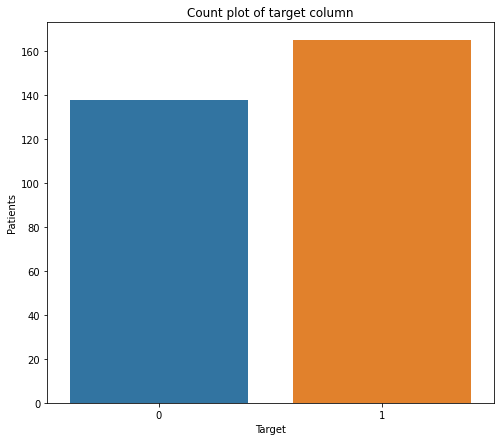

In [ ]:
plt.figure(figsize=(8,7))
sns.countplot(x="target",data=df)
plt.title("Count plot of target column")
plt.xlabel("Target")
plt.ylabel("Patients")
plt.show()

In [ ]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

# Split the train and test data

In [ ]:
features = df.drop(labels='target',axis=1)
level = df.target

In [ ]:
level

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(features,level,test_size=0.3,random_state=1)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(212, 13)
(91, 13)
(212,)
(91,)


## Scaling - mandatory for knn

In [ ]:
scale = StandardScaler()
scale.fit_transform(x_train)
scale.transform(x_test)

array([[ 0.8629717 , -1.57334352, -0.94758246, ..., -2.36875789,
         2.28492491,  1.13305069],
       [ 0.20957884,  0.6355891 ,  0.03235647, ...,  0.9242039 ,
        -0.6990838 ,  1.13305069],
       [-0.66161163,  0.6355891 , -0.94758246, ...,  0.9242039 ,
         1.29025534,  1.13305069],
       ...,
       [-0.98830806, -1.57334352,  0.03235647, ..., -0.722277  ,
        -0.6990838 , -0.53505171],
       [ 0.42737646,  0.6355891 , -0.94758246, ..., -2.36875789,
         2.28492491, -2.20315412],
       [ 1.29856693,  0.6355891 ,  0.03235647, ..., -0.722277  ,
         2.28492491, -2.20315412]])

## We use "model" so we need to know the optimal value of 'k'

In [ ]:
optimal_value = dict()
k_range = range(1,31)
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  scores = knn.score(x_test,y_test)
  optimal_value.update({k:scores})

In [ ]:
optimal_value

{1: 0.5824175824175825,
 2: 0.5054945054945055,
 3: 0.6263736263736264,
 4: 0.5494505494505495,
 5: 0.5934065934065934,
 6: 0.5494505494505495,
 7: 0.5604395604395604,
 8: 0.5934065934065934,
 9: 0.5934065934065934,
 10: 0.5494505494505495,
 11: 0.5934065934065934,
 12: 0.6043956043956044,
 13: 0.6153846153846154,
 14: 0.6373626373626373,
 15: 0.6373626373626373,
 16: 0.6703296703296703,
 17: 0.6593406593406593,
 18: 0.6593406593406593,
 19: 0.6703296703296703,
 20: 0.7032967032967034,
 21: 0.7032967032967034,
 22: 0.7032967032967034,
 23: 0.6593406593406593,
 24: 0.6703296703296703,
 25: 0.6373626373626373,
 26: 0.6483516483516484,
 27: 0.6483516483516484,
 28: 0.6373626373626373,
 29: 0.6703296703296703,
 30: 0.6593406593406593}

In [ ]:
max_key = max(optimal_value,key=optimal_value.get)
max_key

20

In [ ]:
model = KNeighborsClassifier(n_neighbors=20)
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [ ]:
model.score(x_test,y_test)

0.7032967032967034

# Now check the model is the best or not

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0])

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[29, 12],
       [15, 35]])

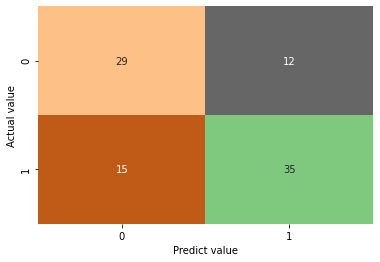

In [ ]:
a = pd.DataFrame(data=conf_matrix)
sns.heatmap(data=a,annot=True,cbar=False,cmap=plt.cm.Accent_r)
plt.xlabel("Predict value")
plt.ylabel("Actual value")
plt.show()

In [ ]:
pd.crosstab(y_test,y_pred,rownames=["Actual"],colnames=["Predicted"],margins=True)

Predicted,0,1,All
Actual,,,
0,29,12,41
1,15,35,50
All,44,47,91


# Precision Score

In [ ]:
precision_score(y_test,y_pred)

0.7446808510638298

What is the Precision for our model? Yes, it is 0.744 or, when it predicts that a patient has heart disease, it is correct around 74.4% of the time.

# Recall Score

In [ ]:
recall_score(y_test,y_pred)

0.7

# Accuracy

In [ ]:
# if datasets is balance datasets than we should use accuracy function
accuracy_score(y_test,y_pred)

0.7032967032967034

# F-1 score

In [ ]:
f1_score(y_test,y_pred)

0.7216494845360825

# Classification report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.71      0.68        41
           1       0.74      0.70      0.72        50

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91



# false positive rate (FPR)

## FPR = FP / FP+TN


In [ ]:
FPR = 12/(12+29)
FPR

0.2926829268292683

## True negative rate (TNR)
### TNR = TN / TN+FP

In [ ]:
TNR = 29/(29+12)
TNR

0.7073170731707317

# ROC Curves(Receiver Operating Characteristic Curve)

In [ ]:
y_pred_proba = knn.predict_proba(x_test)[:,1]

In [ ]:
fpr,tpr,threshold = roc_curve(y_true=y_test,y_score=y_pred_proba)

In [ ]:
print(fpr)
print()
print(tpr)
print()
print(threshold)

[0.         0.02439024 0.04878049 0.09756098 0.09756098 0.12195122
 0.17073171 0.17073171 0.2195122  0.29268293 0.3902439  0.48780488
 0.63414634 0.70731707 0.7804878  0.80487805 0.82926829 0.82926829
 0.97560976 1.        ]

[0.   0.04 0.12 0.16 0.18 0.34 0.4  0.42 0.5  0.6  0.7  0.76 0.78 0.84
 0.88 0.94 0.98 1.   1.   1.  ]

[1.86666667 0.86666667 0.83333333 0.76666667 0.73333333 0.7
 0.66666667 0.63333333 0.6        0.56666667 0.53333333 0.5
 0.46666667 0.43333333 0.4        0.36666667 0.33333333 0.3
 0.2        0.16666667]


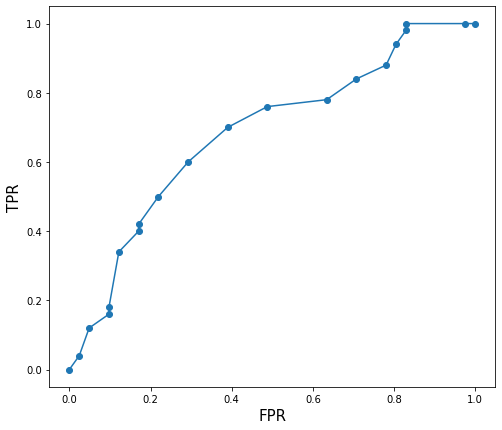

In [ ]:
plt.figure(figsize=(8,7))
plt.plot(fpr,tpr)
plt.scatter(fpr,tpr)
# plt.plot(threshold)
plt.xlabel("FPR",fontsize=15)
plt.ylabel("TPR",fontsize=15)
plt.show()

# AUC(Area under curve)

In [ ]:
roc_auc_score(y_test,y_pred_proba)

0.6821951219512196

# Precision-Recall Curve (PRC)

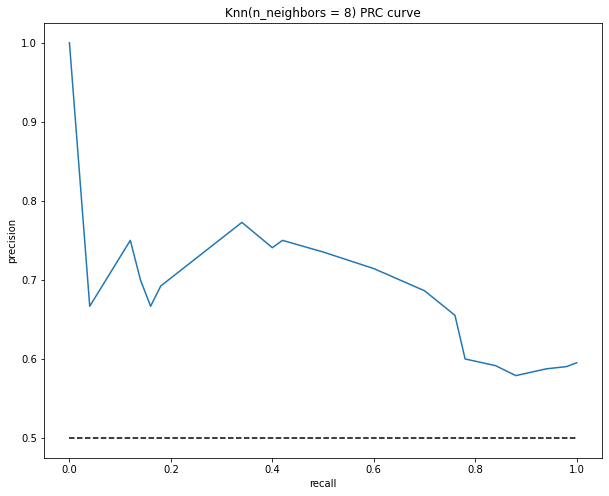

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision, label = 'Knn')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Knn(n_neighbors = 8) PRC curve')
plt.show()

In [ ]:
# calculate precision-recall AUC
auc_prc = auc(recall, precision)
print(auc_prc)

0.6935476121591598
